 ---- s= 0.0  ----
 ---- s= 0.1  ----
 ---- s= 0.2  ----
 ---- s= 0.3  ----
 ---- s= 0.4  ----
 ---- s= 0.5  ----
 ---- s= 0.6  ----
 ---- s= 0.7  ----
 ---- s= 0.8  ----
 ---- s= 0.9  ----
 ---- s= 1.0  ----


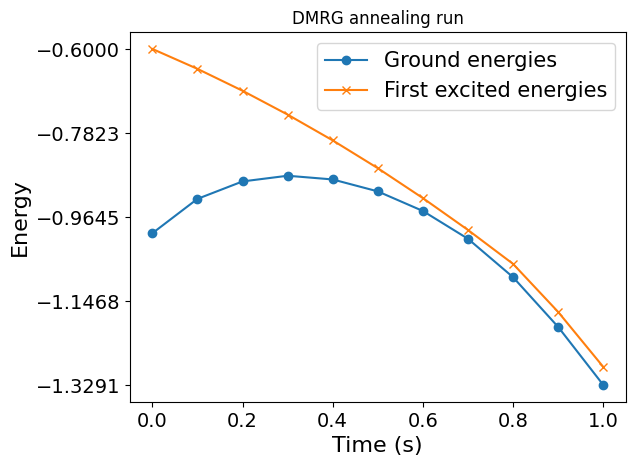

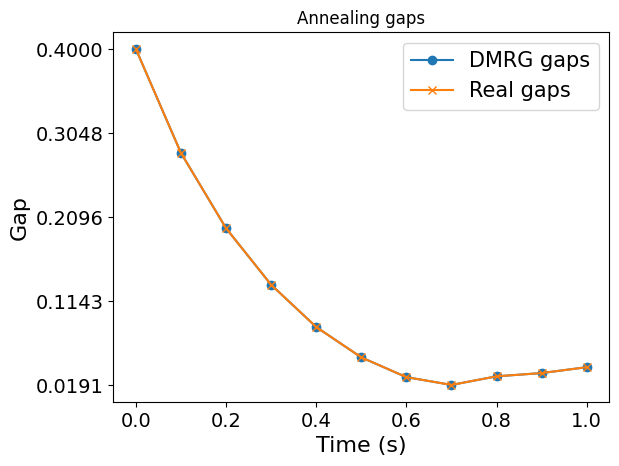

Final error:  2.8204242551979988e-28


In [1]:
import Tests.custom_tests as tests

N, values, weights, W_capacity = tests.random_test(5)

from dmrg_solver import DMRG_solver

chi = 32
opts_maxit = 2
opts_krydim = 4
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi, opts_maxit, opts_krydim)

penalty = 100
numsweeps = 100
qkp_DMRG.show_run_plots = False
error = qkp_DMRG.annealing_run(penalty, step=10, numsweeps = numsweeps, normalization=False)
print('Final error: ', error)

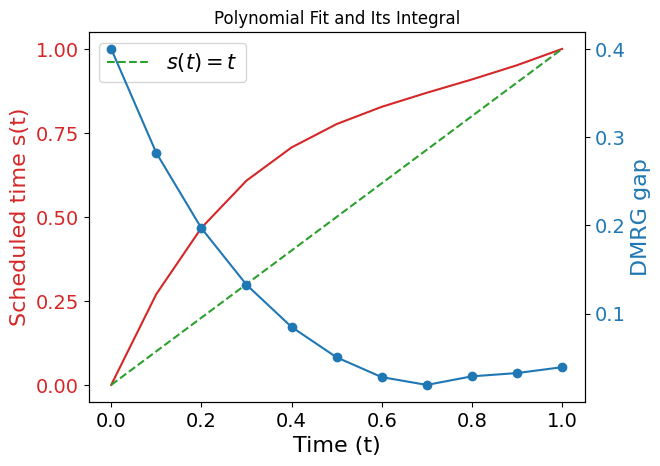

In [2]:
import numpy as np
import matplotlib.pyplot as plt

s = qkp_DMRG.annealing_time_estimation()

[Qibo 0.2.7|INFO|2024-06-09 21:20:09]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-06-09 21:20:09]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-06-09 21:20:09]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [1, 2, 4]
Target energy -1.3290669512973978
+ offset (5019.871107464691) = 5018.542040513394


[Qibo 0.2.7|WARNING|2024-06-09 21:20:31]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


final annealing energy:  -1.2346035775879391
-------- Solution has items:  [1, 2, 4] --------
 - Evaluating candidate  [1, 2, 4]
Profit: 464
Weight: 152 (satisfies constraint W=164)
Energy: -643.4924071731891
-------------------------------------------------
Target energy -1.3290669512973978
+ offset (5019.871107464691) = 5018.542040513394
final annealing energy:  -1.1659404323425133
-------- Solution has items:  [1, 2, 4] --------
 - Evaluating candidate  [1, 2, 4]
Profit: 464
Weight: 152 (satisfies constraint W=164)
Energy: -643.4924071731891
-------------------------------------------------


{'N': 5, 'W': 164, 'profit': 464, 'weight': 152, 'energy': -643.4924071731891}

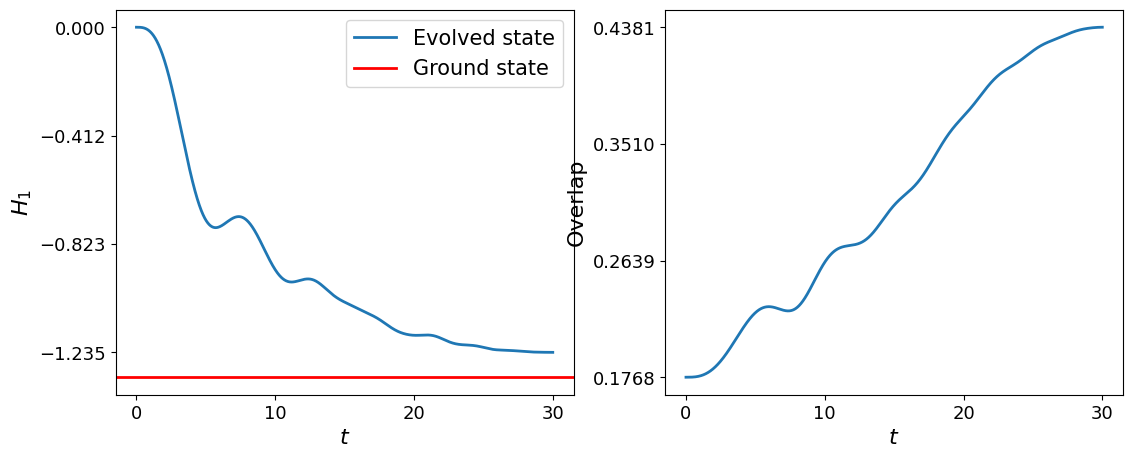

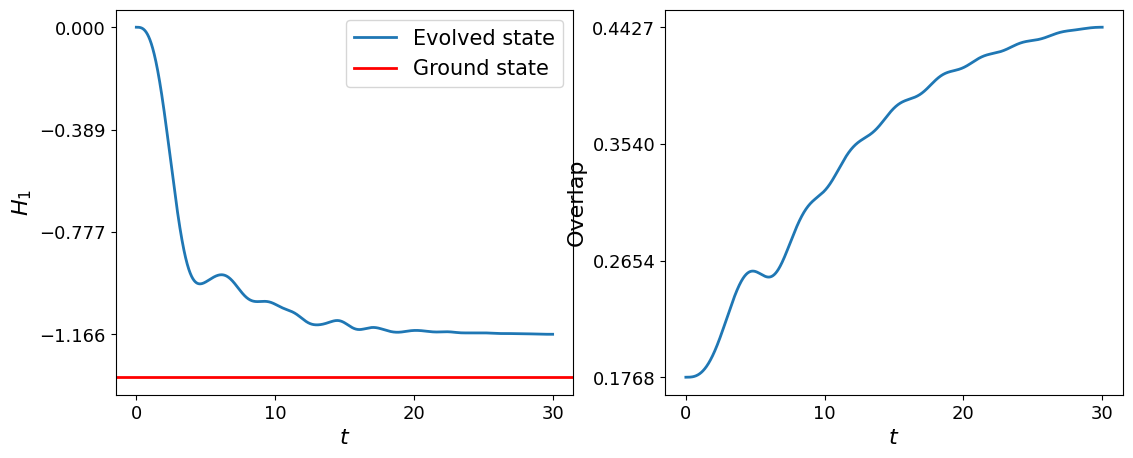

In [3]:
from qibo_solver import Qibo_annealing_solver

Qibo_solver = Qibo_annealing_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
h1 = Qibo_solver.get_ham()

T = 30 # Total time of the adiabatic evolution.
Qibo_solver.run(T)
Qibo_solver.show_solution()

# WITH SCHEDULING
Qibo_solver.set_annealing_schedule(s)
Qibo_solver.run(T)
Qibo_solver.show_solution()